# Evaluate BLIP-2 Caption Results

## Setup Performance Metrics

In [1]:
pip install -q git+https://github.com/huggingface/peft.git transformers bitsandbytes datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.5 MB/s eta 0:00:00


In [2]:
pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.0 MB/s eta 0:00:00


In [3]:
import evaluate

### BLEU (Bilingual Evaluation Understudy)
Based on https://huggingface.co/spaces/evaluate-metric/bleu.

In [4]:
# Input: 1D array of prediction (length n), 1D array of references (length n)
# Output: results (use print)
def evaluate_bleu(predictions, references):
  references = [[ref] for ref in references]
  results = evaluate.load("bleu").compute(predictions=predictions, references=references)
  return str(results)

### METEOR (Metric for Evaluation of Translation with Explicit Ordering)
Based on https://huggingface.co/spaces/evaluate-metric/meteor.

In [5]:
# Input: 1D array of prediction (length n), 1D array of references (length n)
# Output: results (use print)
def evaluate_meteor(predictions, references):
  results = evaluate.load("meteor").compute(predictions=predictions, references=references)
  return str(results['meteor'])

### ROUGE (Recall-Oriented Understudy for Gisting Evaluation)
Based on https://huggingface.co/spaces/evaluate-metric/rouge.

In [6]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=d30f4f41b3319c2b8c759c372f1750a94d1227bd9662883225cbcea95767d32b
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [7]:
# Input: 1D array of prediction (length n), 1D array of references (length n)
# Output: results (use print)
def evaluate_rouge(predictions, references):
  results = evaluate.load("rouge").compute(predictions=predictions, references=references)
  return str(results)

### WER (Word Error Rate)
Based on https://huggingface.co/spaces/evaluate-metric/wer.

In [8]:
pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 11.8 MB/s eta 0:00:00


In [9]:
# Input: 1D array of prediction (length n), 1D array of references (length n)
# Output: results (use print)
def evaluate_wer(predictions, references):
  results = evaluate.load("wer").compute(predictions=predictions, references=references)
  return str(results)

### MAUVE
Based on https://huggingface.co/spaces/evaluate-metric/mauve/.

In [10]:
pip install mauve-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 64.8 MB/s eta 0:00:00


In [27]:
# Input: 1D array of prediction (length n), 1D array of references (length n)
# Output: results (use print)
def evaluate_mauve(predictions, references):
  results = evaluate.load("mauve").compute(predictions=predictions, references=references,device_id=0)
  return str(results.mauve)

### SLA (Semantic Label Accuracy)

In [12]:
# Input: 1D array of LABELS (length n), 1D array of prediction (length n)
# Output: results (use print)
def evaluate_sla(labels, predictions):
    sum = 0
    for i in range(len(labels)):
        if labels[i] in predictions[i]:
            sum += 1
    return str(sum/len(labels))

### SPICE (Semantic Propositional Image Caption Evaluation)

Based on https://github.com/tylin/coco-caption/tree/master.

In [13]:
!pip install github-clone
!ghclone https://github.com/tylin/coco-caption/tree/master/pycocoevalcap/spice/lib
!wget -nc https://github.com/tylin/coco-caption/raw/master/pycocoevalcap/spice/spice-1.0.jar

  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=b507eedefdbf0942be2359c8170503a0ec080cac7ddec465ba6331f22e0c5c58
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
Cloning into 'lib'...
done.
--2023-11-06 01:25:08--  https://github.com/tylin/coco-caption/raw/master/pycocoevalcap/spice/spice-1.0.jar
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tylin/coco-caption/master/pycocoevalcap/spice/spice-1.0.jar [following]
--2023-11-06 01:25:08--  https://raw.githubusercontent.com/tylin/coco-caption/master/pycocoevalcap/spice/spice-1.0.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connectin

In [14]:
# Modified from https://github.com/tylin/coco-caption/blob/master/get_stanford_models.sh

sh = """#!/usr/bin/env sh
# This script downloads the Stanford CoreNLP models.

CORENLP=stanford-corenlp-full-2015-12-09
SPICELIB=lib
JAR=stanford-corenlp-3.6.0

DIR="$( cd "$(dirname "$0")" ; pwd -P )"
cd $DIR

if [ -f $SPICELIB/$JAR.jar ]; then
  echo "Found Stanford CoreNLP."
else
  echo "Downloading..."
  wget http://nlp.stanford.edu/software/$CORENLP.zip
  echo "Unzipping..."
  unzip $CORENLP.zip -d $SPICELIB/
  mv $SPICELIB/$CORENLP/$JAR.jar $SPICELIB/
  mv $SPICELIB/$CORENLP/$JAR-models.jar $SPICELIB/
  rm -f $CORENLP.zip
  rm -rf $SPICELIB/$CORENLP/
  echo "Done."
fi
"""

import os.path
if not os.path.isfile('get_stanford_models.sh'):
  with open('get_stanford_models.sh', 'w') as file:
    file.write(sh)

!bash get_stanford_models.sh

Downloading...
--2023-11-06 01:25:09--  http://nlp.stanford.edu/software/stanford-corenlp-full-2015-12-09.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/software/stanford-corenlp-full-2015-12-09.zip [following]
--2023-11-06 01:25:09--  https://nlp.stanford.edu/software/stanford-corenlp-full-2015-12-09.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-full-2015-12-09.zip [following]
--2023-11-06 01:25:09--  https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-full-2015-12-09.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.

In [15]:
# Modified from https://github.com/tylin/coco-caption/blob/master/pycocoevalcap/spice/spice.py

from __future__ import division
import os
import sys
import subprocess
import threading
import json
import numpy as np
import ast
import tempfile

# Assumes spice.jar is in the same directory as spice.py.  Change as needed.
SPICE_JAR = 'spice-1.0.jar'
TEMP_DIR = 'tmp'
CACHE_DIR = 'cache'

class Spice:
    """
    Main Class to compute the SPICE metric
    """

    def float_convert(self, obj):
        try:
          return float(obj)
        except:
          return np.nan

    def compute_score(self, res, gts):

        # Prepare temp input file for the SPICE scorer
        input_data = []
        for id in range(len(gts)):
            hypo = res[id]
            ref = gts[id]
            input_data.append({
              "image_id" : id,
              "test" : hypo,
              "refs" : [ref]
            })

        cwd = '/content/'
        temp_dir=os.path.join(cwd, TEMP_DIR)
        if not os.path.exists(temp_dir):
          os.makedirs(temp_dir)
        in_file = tempfile.NamedTemporaryFile(delete=False, dir=temp_dir, mode='w')
        json.dump(input_data, in_file, indent=2)
        in_file.close()

        # Start job
        out_file = tempfile.NamedTemporaryFile(delete=False, dir=temp_dir)
        out_file.close()
        cache_dir=os.path.join(cwd, CACHE_DIR)
        if not os.path.exists(cache_dir):
          os.makedirs(cache_dir)
        spice_cmd = ['java', '-jar', '-Xmx8G', SPICE_JAR, in_file.name,
          '-cache', cache_dir,
          '-out', out_file.name,
          '-subset',
          '-silent'
        ]
        subprocess.check_call(spice_cmd, cwd=cwd)

        # Read and process results
        with open(out_file.name) as data_file:
          results = json.load(data_file)
        os.remove(in_file.name)
        os.remove(out_file.name)

        imgId_to_scores = {}
        spice_scores = []
        for item in results:
          imgId_to_scores[item['image_id']] = item['scores']
          spice_scores.append(self.float_convert(item['scores']['All']['f']))
        average_score = np.mean(np.array(spice_scores))
        scores = []
        for image_id in range(len(gts)):
          # Convert none to NaN before saving scores over subcategories
          score_set = {}
          for category,score_tuple in imgId_to_scores[image_id].items():
            score_set[category] = {k: self.float_convert(v) for k, v in score_tuple.items()}
          scores.append(score_set)
        return average_score, scores

In [16]:
# Input: 1D array of prediction (length n), 1D array of references (length n)
# Output: results (use print)
def evaluate_spice(predictions, references):
  results, _ = Spice().compute_score(predictions, references)
  return str(results)

### CIDer (Consensus-based Image Description Evaluation)
Based on https://github.com/tylin/coco-caption/tree/master.

In [17]:
# Modeified from https://github.com/tylin/coco-caption/blob/master/pycocoevalcap/cider/cider_scorer.py

#!/usr/bin/env python
# Tsung-Yi Lin <tl483@cornell.edu>
# Ramakrishna Vedantam <vrama91@vt.edu>

import copy
from collections import defaultdict
import numpy as np
import pdb
import math

def precook(s, n=4, out=False):
    """
    Takes a string as input and returns an object that can be given to
    either cook_refs or cook_test. This is optional: cook_refs and cook_test
    can take string arguments as well.
    :param s: string : sentence to be converted into ngrams
    :param n: int    : number of ngrams for which representation is calculated
    :return: term frequency vector for occuring ngrams
    """
    words = s.split()
    counts = defaultdict(int)
    for k in range(1,n+1):
        for i in range(len(words)-k+1):
            ngram = tuple(words[i:i+k])
            counts[ngram] += 1
    return counts

def cook_refs(refs, n=4): ## lhuang: oracle will call with "average"
    '''Takes a list of reference sentences for a single segment
    and returns an object that encapsulates everything that BLEU
    needs to know about them.
    :param refs: list of string : reference sentences for some image
    :param n: int : number of ngrams for which (ngram) representation is calculated
    :return: result (list of dict)
    '''
    return [precook(ref, n) for ref in refs]

def cook_test(test, n=4):
    '''Takes a test sentence and returns an object that
    encapsulates everything that BLEU needs to know about it.
    :param test: list of string : hypothesis sentence for some image
    :param n: int : number of ngrams for which (ngram) representation is calculated
    :return: result (dict)
    '''
    return precook(test, n, True)

class CiderScorer(object):
    """CIDEr scorer.
    """

    def copy(self):
        ''' copy the refs.'''
        new = CiderScorer(n=self.n)
        new.ctest = copy.copy(self.ctest)
        new.crefs = copy.copy(self.crefs)
        return new

    def __init__(self, test=None, refs=None, n=4, sigma=6.0):
        ''' singular instance '''
        self.n = n
        self.sigma = sigma
        self.crefs = []
        self.ctest = []
        self.document_frequency = defaultdict(float)
        self.cook_append(test, refs)
        self.ref_len = None

    def cook_append(self, test, refs):
        '''called by constructor and __iadd__ to avoid creating new instances.'''

        if refs is not None:
            self.crefs.append(cook_refs(refs))
            if test is not None:
                self.ctest.append(cook_test(test)) ## N.B.: -1
            else:
                self.ctest.append(None) # lens of crefs and ctest have to match

    def size(self):
        assert len(self.crefs) == len(self.ctest), "refs/test mismatch! %d<>%d" % (len(self.crefs), len(self.ctest))
        return len(self.crefs)

    def __iadd__(self, other):
        '''add an instance (e.g., from another sentence).'''

        if type(other) is tuple:
            ## avoid creating new CiderScorer instances
            self.cook_append(other[0], other[1])
        else:
            self.ctest.extend(other.ctest)
            self.crefs.extend(other.crefs)

        return self
    def compute_doc_freq(self):
        '''
        Compute term frequency for reference data.
        This will be used to compute idf (inverse document frequency later)
        The term frequency is stored in the object
        :return: None
        '''
        for refs in self.crefs:
            # refs, k ref captions of one image
            for ngram in set([ngram for ref in refs for (ngram,count) in ref.items()]):
                self.document_frequency[ngram] += 1
            # maxcounts[ngram] = max(maxcounts.get(ngram,0), count)

    def compute_cider(self):
        def counts2vec(cnts):
            """
            Function maps counts of ngram to vector of tfidf weights.
            The function returns vec, an array of dictionary that store mapping of n-gram and tf-idf weights.
            The n-th entry of array denotes length of n-grams.
            :param cnts:
            :return: vec (array of dict), norm (array of float), length (int)
            """
            vec = [defaultdict(float) for _ in range(self.n)]
            length = 0
            norm = [0.0 for _ in range(self.n)]
            for (ngram,term_freq) in cnts.items():
                # give word count 1 if it doesn't appear in reference corpus
                df = np.log(max(1.0, self.document_frequency[ngram]))
                # ngram index
                n = len(ngram)-1
                # tf (term_freq) * idf (precomputed idf) for n-grams
                vec[n][ngram] = float(term_freq)*(self.ref_len - df)
                # compute norm for the vector.  the norm will be used for computing similarity
                norm[n] += pow(vec[n][ngram], 2)

                if n == 1:
                    length += term_freq
            norm = [np.sqrt(n) for n in norm]
            return vec, norm, length

        def sim(vec_hyp, vec_ref, norm_hyp, norm_ref, length_hyp, length_ref):
            '''
            Compute the cosine similarity of two vectors.
            :param vec_hyp: array of dictionary for vector corresponding to hypothesis
            :param vec_ref: array of dictionary for vector corresponding to reference
            :param norm_hyp: array of float for vector corresponding to hypothesis
            :param norm_ref: array of float for vector corresponding to reference
            :param length_hyp: int containing length of hypothesis
            :param length_ref: int containing length of reference
            :return: array of score for each n-grams cosine similarity
            '''
            delta = float(length_hyp - length_ref)
            # measure consine similarity
            val = np.array([0.0 for _ in range(self.n)])
            for n in range(self.n):
                # ngram
                for (ngram,count) in vec_hyp[n].items():
                    # vrama91 : added clipping
                    val[n] += min(vec_hyp[n][ngram], vec_ref[n][ngram]) * vec_ref[n][ngram]

                if (norm_hyp[n] != 0) and (norm_ref[n] != 0):
                    val[n] /= (norm_hyp[n]*norm_ref[n])

                assert(not math.isnan(val[n]))
                # vrama91: added a length based gaussian penalty
                val[n] *= np.e**(-(delta**2)/(2*self.sigma**2))
            return val

        # compute log reference length
        self.ref_len = np.log(float(len(self.crefs)))

        scores = []
        for test, refs in zip(self.ctest, self.crefs):
            # compute vector for test captions
            vec, norm, length = counts2vec(test)
            # compute vector for ref captions
            score = np.array([0.0 for _ in range(self.n)])
            for ref in refs:
                vec_ref, norm_ref, length_ref = counts2vec(ref)
                score += sim(vec, vec_ref, norm, norm_ref, length, length_ref)
            # change by vrama91 - mean of ngram scores, instead of sum
            score_avg = np.mean(score)
            # divide by number of references
            score_avg /= len(refs)
            # multiply score by 10
            # score_avg *= 10.0
            # append score of an image to the score list
            scores.append(score_avg)
        return scores

    def compute_score(self, option=None, verbose=0):
        # compute idf
        self.compute_doc_freq()
        # assert to check document frequency
        assert(len(self.ctest) >= max(self.document_frequency.values()))
        # compute cider score
        score = self.compute_cider()
        # debug
        # print(score)
        return np.mean(np.array(score)), np.array(score)

In [18]:
# Modified from https://github.com/tylin/coco-caption/blob/master/pycocoevalcap/cider/cider.py

# Filename: cider.py
#
# Description: Describes the class to compute the CIDEr (Consensus-Based Image Description Evaluation) Metric
#               by Vedantam, Zitnick, and Parikh (http://arxiv.org/abs/1411.5726)
#
# Creation Date: Sun Feb  8 14:16:54 2015
#
# Authors: Ramakrishna Vedantam <vrama91@vt.edu> and Tsung-Yi Lin <tl483@cornell.edu>

import pdb

class Cider:
    """
    Main Class to compute the CIDEr metric

    """
    def __init__(self, test=None, refs=None, n=4, sigma=6.0):
        # set cider to sum over 1 to 4-grams
        self._n = n
        # set the standard deviation parameter for gaussian penalty
        self._sigma = sigma

    def compute_score(self, res, gts):
        """
        Main function to compute CIDEr score
        :param  hypo_for_image: <tokenized hypothesis / candidate sentence>
                ref_for_image : <tokenized reference sentence>
        :return: cider (float) : computed CIDEr score for the corpus
        """

        cider_scorer = CiderScorer(n=self._n, sigma=self._sigma)

        for id in range(len(gts)):
            hypo = res[id]
            ref = gts[id]
            cider_scorer += (hypo, ref)

        (score, scores) = cider_scorer.compute_score()

        return score, scores

In [19]:
# Input: 1D array of prediction (length n), 1D array of references (length n)
# Output: results (use print)
def evaluate_cider(predictions, references):
  references = [[ref] for ref in references]
  results, _ = Cider().compute_score(predictions, references)
  return str(results)

### Pipeline to Compute all Metrics for Generated Captions

In [20]:
def evaluate_all(labels, predictions, true_captions):
  print("---- 1. BLEU: " + evaluate_bleu(predictions=predictions, references=true_captions))
  print("---- 2. METEOR: " + evaluate_meteor(predictions=predictions, references=true_captions))
  print("---- 3. ROUGE: " + evaluate_rouge(predictions=predictions, references=true_captions))
  print("---- 4. WER: " + evaluate_wer(predictions=predictions, references=true_captions))
  print("---- 5. MAUVE: " + evaluate_mauve(predictions=predictions, references=true_captions))
  print("---- 6. SLA: " + evaluate_sla(labels=labels, predictions=predictions))
  print("---- 7. SPICE: " + evaluate_spice(predictions=predictions, references=true_captions))
  print("---- 8. CIDer: " + evaluate_cider(predictions=predictions, references=true_captions))

## Evaluate Generated Captions

### Load Test Dataset

In [21]:
from datasets import load_dataset
dataset = load_dataset("advancedcv/Food500Cap_test",split="test")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

### Get Ground Truth Labels and Captions

In [22]:
import string

# Helper function to clean captions
def handle_caption(caption):
  punctuation = set(string.punctuation)

  if caption.endswith('\n'):
    caption = caption[:-len('\n')]
  if caption.endswith('�'):
    caption = caption[:-len('�')]

  # lower case
  caption = caption.lower()

  # remove underlines
  caption = caption.replace("_", " ")

  # remove punctuations
  caption = ''.join([c for c in caption if not c in punctuation])

  # remove extra spaces
  caption = ' '.join(caption.split())

  return caption

In [23]:
actual_captions = []
for data in dataset:
  actual_captions.append(handle_caption(data['caption']))

In [24]:
actual_labels = []
for data in dataset:
  actual_labels.append(handle_caption(data['cat']))

### Compute Performance Metrics

In [25]:
import numpy as np
def compute_metrics(prediction_file, actual_labels, actual_captions):
  pred = np.load(prediction_file).tolist()
  predictions = []
  # Clean the predictions
  for p in pred:
    predictions.append(handle_caption(p))
  # Compute metrics
  evaluate_all(labels=actual_labels, predictions=predictions, true_captions=actual_captions)

#### Evaluate naive Captioning with Original BLIP-2

In [28]:
compute_metrics("BLIP2_original_naive_captioning_results.npy", actual_labels, actual_captions)

---- 1. BLEU: {'bleu': 0.018791227039026113, 'precisions': [0.491910060268892, 0.10834511282131826, 0.030302119344656545, 0.006495340299350466], 'brevity_penalty': 0.3301890401058961, 'length_ratio': 0.47436306257765853, 'translation_length': 43140, 'reference_length': 90943}


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


---- 2. METEOR: 0.1739943632148248
---- 3. ROUGE: {'rouge1': 0.31714022218082005, 'rouge2': 0.06677407864904672, 'rougeL': 0.26149155772132615, 'rougeLsum': 0.26152838448971727}
---- 4. WER: 0.837931451568565
Tokenizing text...
Featurizing tokens


Featurizing p:   0%|          | 0/4938 [00:00<?, ?it/s]

Tokenizing text...
Featurizing tokens


Featurizing q:   0%|          | 0/4938 [00:00<?, ?it/s]

seed = 25
performing clustering in lower dimension = 260
kmeans time: 127.2 s
total discretization time: 132.56 seconds
---- 5. MAUVE: 0.048930565843995855
---- 6. SLA: 0.1016605913325233
---- 7. SPICE: 0.14050986197964982
---- 8. CIDer: 0.021861109947449275


#### Evaluate Multiple Prompted Captioning with Original BLIP-2

In [29]:
compute_metrics("BLIP2_original_multiple_prompted_captioning_results.npy", actual_labels, actual_captions)

---- 1. BLEU: {'bleu': 0.018107561199580537, 'precisions': [0.41365868736476974, 0.057509006304413086, 0.01416518466437818, 0.0030170428374021187], 'brevity_penalty': 0.5702489958030355, 'length_ratio': 0.6403351549871897, 'translation_length': 58234, 'reference_length': 90943}


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


---- 2. METEOR: 0.17597484541200514
---- 3. ROUGE: {'rouge1': 0.3238433584229215, 'rouge2': 0.04413329523154488, 'rougeL': 0.26319781130478526, 'rougeLsum': 0.2632474065288432}
---- 4. WER: 0.8526659555985617
Tokenizing text...
Featurizing tokens


Featurizing p:   0%|          | 0/4938 [00:00<?, ?it/s]

Tokenizing text...
Featurizing tokens


Featurizing q:   0%|          | 0/4938 [00:00<?, ?it/s]

seed = 25
performing clustering in lower dimension = 261
kmeans time: 130.45 s
total discretization time: 133.54 seconds
---- 5. MAUVE: 0.032262577715778416
---- 6. SLA: 0.14823815309842042
---- 7. SPICE: 0.11098679522440204
---- 8. CIDer: 0.02721073057922466


#### Evaluate VQA with Original BLIP-2

In [30]:
compute_metrics("BLIP2_original_VQA_results.npy", actual_labels, actual_captions)

---- 1. BLEU: {'bleu': 0.016907478861212806, 'precisions': [0.33280691160759907, 0.04275008801488709, 0.01151505181773318, 0.0025515841922327366], 'brevity_penalty': 0.6649325078740433, 'length_ratio': 0.7101920983473164, 'translation_length': 64587, 'reference_length': 90943}


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


---- 2. METEOR: 0.1533331923946101
---- 3. ROUGE: {'rouge1': 0.2770032662087818, 'rouge2': 0.034904375526436014, 'rougeL': 0.23100257780817923, 'rougeLsum': 0.23108850345575227}
---- 4. WER: 0.8988157417283353
Tokenizing text...
Featurizing tokens


Featurizing p:   0%|          | 0/4938 [00:00<?, ?it/s]

Tokenizing text...
Featurizing tokens


Featurizing q:   0%|          | 0/4938 [00:00<?, ?it/s]

seed = 25
performing clustering in lower dimension = 280
kmeans time: 137.36 s
total discretization time: 140.29 seconds
---- 5. MAUVE: 0.02162853276059904
---- 6. SLA: 0.15856622114216282
---- 7. SPICE: 0.08392335127029829
---- 8. CIDer: 0.021892024546522254


#### Evaluate Naive Captioning with BLIP-2 Fine-tuned on Entire Fine-tuning Set

In [31]:
compute_metrics("BLIP2_finetuned_all_naive_captioning_results.npy", actual_labels, actual_captions)

---- 1. BLEU: {'bleu': 0.08468179499472855, 'precisions': [0.4262403398029615, 0.13693824623827006, 0.05418074493516206, 0.02177549648989863], 'brevity_penalty': 0.9295911233130401, 'length_ratio': 0.9319573798972983, 'translation_length': 84755, 'reference_length': 90943}


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


---- 2. METEOR: 0.3051726099209701
---- 3. ROUGE: {'rouge1': 0.41085702950714015, 'rouge2': 0.13094145227238457, 'rougeL': 0.33339255988719696, 'rougeLsum': 0.33334920098913035}
---- 4. WER: 0.8791000956643172
Tokenizing text...
Featurizing tokens


Featurizing p:   0%|          | 0/4938 [00:00<?, ?it/s]

Tokenizing text...
Featurizing tokens


Featurizing q:   0%|          | 0/4938 [00:00<?, ?it/s]

seed = 25
performing clustering in lower dimension = 260
kmeans time: 122.58 s
total discretization time: 126.56 seconds
---- 5. MAUVE: 0.30196323849037576
---- 6. SLA: 0.48177399756986633
---- 7. SPICE: 0.2092456822749742
---- 8. CIDer: 0.07620717543915323


#### Evaluate Naive Captioning with BLIP-2 Fine-tuned on Subset of Fine-tuning Set

In [121]:
compute_metrics("BLIP2_finetuned_sub_naive_captioning_results.npy", actual_labels, actual_captions)

---- 1. BLEU: {'bleu': 0.05759196307672358, 'precisions': [0.35579268632277755, 0.09193884887846392, 0.03153902954906697, 0.01123220788922535], 'brevity_penalty': 0.9870962404180694, 'length_ratio': 0.9871787823141968, 'translation_length': 89777, 'reference_length': 90943}


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


---- 2. METEOR: 0.25772823827429275
---- 3. ROUGE: {'rouge1': 0.35182564058038723, 'rouge2': 0.09065996488522642, 'rougeL': 0.2791623514330234, 'rougeLsum': 0.27913815397535985}
---- 4. WER: 0.9548288488393829
Tokenizing text...
Featurizing tokens


Featurizing p:   0%|          | 0/4938 [00:00<?, ?it/s]

Tokenizing text...
Featurizing tokens


Featurizing q:   0%|          | 0/4938 [00:00<?, ?it/s]

seed = 25
performing clustering in lower dimension = 288
kmeans time: 132.61 s
total discretization time: 137.14 seconds
---- 5. MAUVE: 0.666755485910565
---- 6. SLA: 0.3001215066828676
---- 7. SPICE: 0.15915582707712328
---- 8. CIDer: 0.050104037464751


### Get Sample Predictions

#### Ground Truth

In [129]:
def get_sample_predictions(prediction_file,sample_idx):
  pred = np.load(prediction_file).tolist()
  predictions = []
  # Clean the predictions
  for p in pred:
    predictions.append(handle_caption(p))
  return predictions[sample_idx]


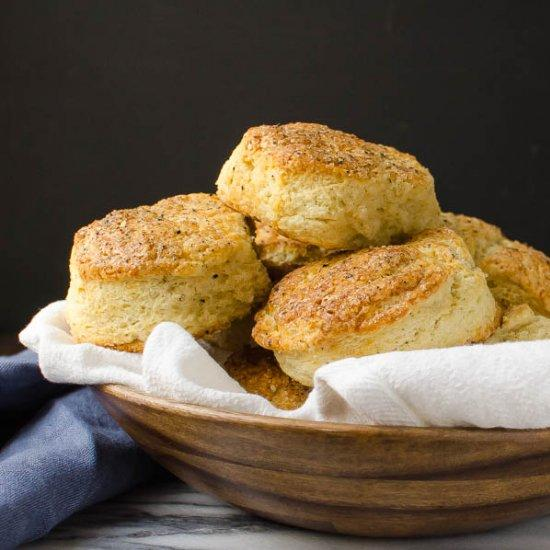

In [83]:
dataset[900]["image"]

In [84]:
dataset[900]["cat"]

'Buttery_bread'

In [133]:
dataset[900]["caption"]

'A wood deep plate full of freshly baked thick yellow buttery bread topped with black pepper'

#### Sample prediction from naive captioning with original BLIP2

In [132]:
get_sample_predictions("BLIP2_original_naive_captioning_results.npy",900)

'biscuits in a bowl'

#### Sample prediction from multiple prompted captioning with original BLIP2

In [131]:
get_sample_predictions("BLIP2_original_multiple_prompted_captioning_results.npy",900)

'a dish of alexanders biscuits with the biscuits and the bowl'

#### Sample prediction from VQA with original BLIP2

In [134]:
get_sample_predictions("BLIP2_original_VQA_results.npy",900)

'a dish of biscuits with flour butter baking powder salt and baking soda'

#### Sample prediction from naive captioning with BLIP2 fine-tuned on entire fine-tuning set

In [135]:
get_sample_predictions("BLIP2_finetuned_all_naive_captioning_results.npy",900)

'a wooden bowl of buttery bread with a crispy crust served with a napkin underneath'

#### Sample prediction from naive captioning with BLIP2 fine-tuned on subset of fine-tuning set

In [136]:
get_sample_predictions("BLIP2_finetuned_sub_naive_captioning_results.npy",900)

'a bowl of buttery bread pudding with a topping of chopped cinnamon'